In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student_score.csv')
print('Data imported successfully')
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


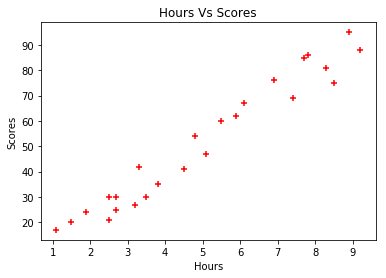

In [3]:

plt.title('Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data[['Hours']], data.Scores, color='red', marker='+')

In [4]:
x = data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [5]:
y = data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [7]:
len(x_train), len(x_test)

(20, 5)

In [8]:
len(y_train), len(y_test)

(20, 5)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [10]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_pred = reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [12]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [13]:
# compare actual and pedicted score by model
compare_prediction = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
compare_prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# mean squared error is-
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
mse(y_test, y_pred)

21.5987693072174

In [15]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error
mae(y_test, y_pred)

4.183859899002975

In [16]:
slope= reg.coef_

In [17]:
intercept=reg.intercept_

Text(0.5, 1.0, 'Hours Vs Percentage')

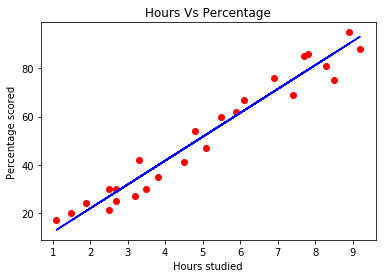

In [18]:
# line = mx+c
line = slope*x + intercept
plt.scatter(x, y, color='red', marker='o')
plt.plot(x, line, color='blue')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Hours Vs Percentage')

In [27]:
#predicted score if a student study for 9.25 hrs in a day
hours = 9.25
score_pred=reg.predict([[hours]])
score_pred

array([93.69173249])

In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)*100
score

94.54906892105356